# Artificial Neural Network Classifier

## Imports

In [1]:
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

import keras
from keras import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.layers import Dropout, Dense
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras import regularizers
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')
random_state = 27

Using TensorFlow backend.


## Scripts

In [31]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py
%run ../util/PlotLosses.py

# Load the data

In [25]:
data = load_data("../../Data", False)
X = data['train_data'][data['numerical_attributes'] + data['categorical_attributes']]
y = data['train_data'][data['target']]

In [ ]:
X.head()

# Scale it before training

In [26]:
scaler = MinMaxScaler()
scaler.fit(X[data['numerical_attributes']])
X[data['numerical_attributes']] = scaler.transform(X[data['numerical_attributes']])

E:\Anaconda\envs\Homework3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Build neural network model

In [89]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(54, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))

print(model.summary())
optimizer2 = Adam(lr=0.01, decay=1e-2)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer2,
              metrics=['accuracy'])
print("Done building nn..")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 32)                1760      
_________________________________________________________________
dense_95 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_96 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_97 (Dense)             (None, 8)                 104       
Total params: 2,596
Trainable params: 2,596
Non-trainable params: 0
_________________________________________________________________
None
Done building nn..


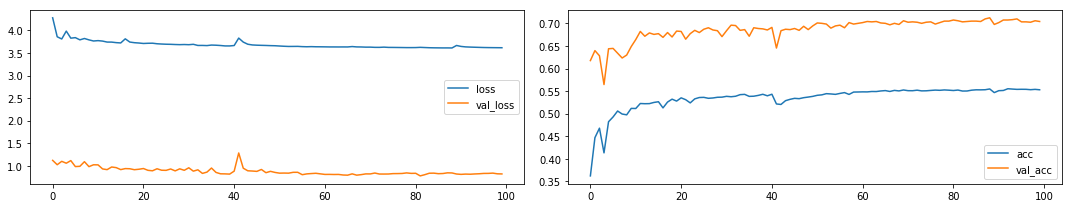

In [90]:
plot_losses = PlotLosses()
checkpointer = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(patience=5, verbose=1)
model.fit(X,
          to_categorical(y),
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_split=0.1,
          shuffle=True,
          callbacks=[checkpointer, plot_losses])

In [91]:
model = load_model('model.h5')
model.evaluate(X, to_categorical(y))

12234/12234 [==============================] - 2s 145us/step


[3.334111457276777, 0.5673532777602754]

In [92]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

y_predicted_total = [None] * len(X)

fold_no = 0
for train_index, test_index in skf.split(X, y):
    fold_no = fold_no + 1
    print("Fold %s" % (fold_no))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer2,
              metrics=['accuracy'])
    
    model.fit(X_train,
          to_categorical(y_train),
          batch_size=128,
          epochs=50,
          shuffle=True,
          callbacks=[checkpointer])
    
    model = load_model('model.h5')
    
    y_predicted = model.predict(X_test).tolist()
    for idx, index in enumerate(test_index):
        y_predicted_total[index] = y_predicted[idx]

Fold 1
Epoch 1/50
11007/11007 [==============================] - 2s 223us/step - loss: 3.3601 - acc: 0.5678 0s - loss: 3.3662 - acc: 0.569
Epoch 2/50
11007/11007 [==============================] - 1s 73us/step - loss: 3.3492 - acc: 0.5690
Epoch 3/50
11007/11007 [==============================] - 1s 47us/step - loss: 3.3429 - acc: 0.5738
Epoch 4/50
11007/11007 [==============================] - 1s 52us/step - loss: 3.3422 - acc: 0.5747
Epoch 5/50
11007/11007 [==============================] - 1s 51us/step - loss: 3.3420 - acc: 0.5702
Epoch 6/50
11007/11007 [==============================] - 1s 51us/step - loss: 3.3383 - acc: 0.5745
Epoch 7/50
11007/11007 [==============================] - 1s 50us/step - loss: 3.3364 - acc: 0.5754
Epoch 8/50
11007/11007 [==============================] - 1s 52us/step - loss: 3.3346 - acc: 0.5766
Epoch 9/50
11007/11007 [==============================] - 1s 51us/step - loss: 3.3335 - acc: 0.5762
Epoch 10/50
11007/11007 [==============================] - 1s

11007/11007 [==============================] - 0s 45us/step - loss: 3.3114 - acc: 0.5749
Epoch 32/50
11007/11007 [==============================] - 1s 46us/step - loss: 3.3092 - acc: 0.5750
Epoch 33/50
11007/11007 [==============================] - 1s 47us/step - loss: 3.3089 - acc: 0.5752
Epoch 34/50
11007/11007 [==============================] - 1s 45us/step - loss: 3.3103 - acc: 0.5738
Epoch 35/50
11007/11007 [==============================] - 1s 47us/step - loss: 3.3094 - acc: 0.5753
Epoch 36/50
11007/11007 [==============================] - 1s 46us/step - loss: 3.3074 - acc: 0.5750
Epoch 37/50
11007/11007 [==============================] - 0s 45us/step - loss: 3.3097 - acc: 0.5755
Epoch 38/50
11007/11007 [==============================] - 1s 46us/step - loss: 3.3108 - acc: 0.5765
Epoch 39/50
11007/11007 [==============================] - 1s 47us/step - loss: 3.3075 - acc: 0.5747
Epoch 40/50
11007/11007 [==============================] - 1s 46us/step - loss: 3.3082 - acc: 0.5763
Ep

11009/11009 [==============================] - 1s 48us/step - loss: 3.3227 - acc: 0.5713
Epoch 13/50
11009/11009 [==============================] - 1s 75us/step - loss: 3.3224 - acc: 0.5713
Epoch 14/50
11009/11009 [==============================] - 1s 81us/step - loss: 3.3230 - acc: 0.5716
Epoch 15/50
11009/11009 [==============================] - 1s 64us/step - loss: 3.3225 - acc: 0.5723
Epoch 16/50
11009/11009 [==============================] - 1s 54us/step - loss: 3.3221 - acc: 0.5717
Epoch 17/50
11009/11009 [==============================] - 1s 54us/step - loss: 3.3219 - acc: 0.5720
Epoch 18/50
11009/11009 [==============================] - 1s 50us/step - loss: 3.3214 - acc: 0.5723
Epoch 19/50
11009/11009 [==============================] - 1s 47us/step - loss: 3.3209 - acc: 0.5726
Epoch 20/50
11009/11009 [==============================] - 1s 48us/step - loss: 3.3210 - acc: 0.5723
Epoch 21/50
11009/11009 [==============================] - 1s 48us/step - loss: 3.3203 - acc: 0.5723
Ep

11011/11011 [==============================] - 1s 48us/step - loss: 3.3012 - acc: 0.5775
Epoch 44/50
11011/11011 [==============================] - 1s 48us/step - loss: 3.3007 - acc: 0.5774
Epoch 45/50
11011/11011 [==============================] - 1s 50us/step - loss: 3.3006 - acc: 0.5790
Epoch 46/50
11011/11011 [==============================] - 1s 49us/step - loss: 3.3004 - acc: 0.5781
Epoch 47/50
11011/11011 [==============================] - 1s 49us/step - loss: 3.3001 - acc: 0.5785
Epoch 48/50
11011/11011 [==============================] - 1s 51us/step - loss: 3.3000 - acc: 0.5787
Epoch 49/50
11011/11011 [==============================] - 1s 48us/step - loss: 3.2994 - acc: 0.5786
Epoch 50/50
11011/11011 [==============================] - 1s 49us/step - loss: 3.2993 - acc: 0.5789
Fold 6
Epoch 1/50
11011/11011 [==============================] - 3s 249us/step - loss: 3.3337 - acc: 0.5710
Epoch 2/50
11011/11011 [==============================] - 1s 49us/step - loss: 3.3272 - acc: 0.5

11013/11013 [==============================] - 1s 50us/step - loss: 3.3215 - acc: 0.5697
Epoch 25/50
11013/11013 [==============================] - 1s 50us/step - loss: 3.3212 - acc: 0.5709
Epoch 26/50
11013/11013 [==============================] - 1s 50us/step - loss: 3.3210 - acc: 0.5695
Epoch 27/50
11013/11013 [==============================] - 1s 50us/step - loss: 3.3207 - acc: 0.5701
Epoch 28/50
11013/11013 [==============================] - 1s 49us/step - loss: 3.3204 - acc: 0.5702
Epoch 29/50
11013/11013 [==============================] - 1s 48us/step - loss: 3.3204 - acc: 0.5694
Epoch 30/50
11013/11013 [==============================] - 1s 50us/step - loss: 3.3200 - acc: 0.5702
Epoch 31/50
11013/11013 [==============================] - 1s 49us/step - loss: 3.3199 - acc: 0.5696
Epoch 32/50
11013/11013 [==============================] - 1s 49us/step - loss: 3.3196 - acc: 0.5697
Epoch 33/50
11013/11013 [==============================] - 1s 50us/step - loss: 3.3193 - acc: 0.5710
Ep

11014/11014 [==============================] - 1s 62us/step - loss: 3.3317 - acc: 0.5641
Epoch 5/50
11014/11014 [==============================] - 1s 60us/step - loss: 3.3306 - acc: 0.5654
Epoch 6/50
11014/11014 [==============================] - 1s 61us/step - loss: 3.3297 - acc: 0.5664
Epoch 7/50
11014/11014 [==============================] - 1s 61us/step - loss: 3.3291 - acc: 0.5662
Epoch 8/50
11014/11014 [==============================] - 1s 59us/step - loss: 3.3288 - acc: 0.5660
Epoch 9/50
11014/11014 [==============================] - 1s 64us/step - loss: 3.3282 - acc: 0.5666
Epoch 10/50
11014/11014 [==============================] - 1s 61us/step - loss: 3.3279 - acc: 0.5664
Epoch 11/50
11014/11014 [==============================] - 1s 52us/step - loss: 3.3275 - acc: 0.5662
Epoch 12/50
11014/11014 [==============================] - 1s 53us/step - loss: 3.3271 - acc: 0.5662
Epoch 13/50
11014/11014 [==============================] - 1s 52us/step - loss: 3.3260 - acc: 0.5666
Epoch 1

11014/11014 [==============================] - 1s 52us/step - loss: 3.3104 - acc: 0.5741
Epoch 35/50
11014/11014 [==============================] - 1s 53us/step - loss: 3.3102 - acc: 0.5735
Epoch 36/50
11014/11014 [==============================] - 1s 52us/step - loss: 3.3100 - acc: 0.5743
Epoch 37/50
11014/11014 [==============================] - 1s 52us/step - loss: 3.3097 - acc: 0.5742
Epoch 38/50
11014/11014 [==============================] - 1s 51us/step - loss: 3.3095 - acc: 0.5745: 0s - loss: 3.2557 - acc
Epoch 39/50
11014/11014 [==============================] - 1s 52us/step - loss: 3.3092 - acc: 0.5743
Epoch 40/50
11014/11014 [==============================] - 1s 50us/step - loss: 3.3090 - acc: 0.5753
Epoch 41/50
11014/11014 [==============================] - 1s 51us/step - loss: 3.3088 - acc: 0.5742
Epoch 42/50
11014/11014 [==============================] - 1s 51us/step - loss: 3.3086 - acc: 0.5749
Epoch 43/50
11014/11014 [==============================] - 1s 52us/step - loss

In [ ]:
plot_confusion_matrix(y, np.argmax(y_predicted_total, axis=1), classes=list(set(y[data['target']])),
                  title='Confusion matrix for train dataset')

In [ ]:
target_names = ['Class ' + str(index) for index in list(set(y[data['target'][0]].tolist()))]
print(classification_report(y, np.argmax(y_predicted_total, axis=1), target_names=target_names))